In [6]:
#数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件。
#id属性对构建回归预测模型没有帮助，请剔除掉该列。
#我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。
#为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。
#y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。
#请将DataFrame对象转换为Numpy数组，方便后续操作。
import pandas as pd
import numpy as np

# 读取CSV文件
file_path = r"C:\Users\flipp\Desktop\Dase导论\bike.csv"
df = pd.read_csv(file_path)

# 剔除id列
if 'id' in df.columns:
    df = df.drop(columns=['id'])
else:
    print("警告: id列不存在")

# 筛选出上海市的数据并剔除city列
if 'city' in df.columns:
    df = df[df['city'] == 1]  # 1表示上海
    df = df.drop(columns=['city'])
else:
    print("警告: city列不存在或没有上海的数据")

# 简化hour列
if 'hour' in df.columns:
    def simplify_hour(hour):
        if 6 <= hour <= 18:
            return 1
        else:
            return 0
    df['hour'] = df['hour'].apply(simplify_hour)
else:
    print("警告: hour列不存在")

# 提取y列并转换为numpy列向量，同时剔除y列
if 'y' in df.columns:
    y = df['y'].values.reshape(-1, 1)
    df = df.drop(columns=['y'])
else:
    print("警告: y列不存在")

# 将DataFrame对象转换为Numpy数组
X = df.values

# 打印关键信息以验证
print("X (特征矩阵)的形状:", X.shape)
print("y (标签向量)的形状:", y.shape)

X (特征矩阵)的形状: (4998, 6)
y (标签向量)的形状: (4998, 1)


In [8]:
#请按照训练集与测试集8:2的比例将原始数据集划分。
#请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。
#请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。
#利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。
#模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 读取CSV文件
file_path = r"C:\Users\flipp\Desktop\Dase导论\bike.csv"
df = pd.read_csv(file_path)

# 剔除id列
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# 筛选出上海市的数据并剔除city列
if 'city' in df.columns:
    df = df[df['city'] == 1]  # 1表示上海
    df = df.drop(columns=['city'])

# 简化hour列
if 'hour' in df.columns:
    def simplify_hour(hour):
        if 6 <= hour <= 18:
            return 1
        else:
            return 0
    df['hour'] = df['hour'].apply(simplify_hour)

# 提取y列并转换为numpy列向量，同时剔除y列
if 'y' in df.columns:
    y = df['y'].values.reshape(-1, 1)
    df = df.drop(columns=['y'])

# 将DataFrame对象转换为Numpy数组
X = df.values

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 归一化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 归一化标签
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)

# 构建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 利用测试集对训练好的模型进行评估
y_pred = model.predict(X_test)

# 反归一化预测值
y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)

# 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"均方根误差 (RMSE): {rmse}")

均方根误差 (RMSE): 31.56847863511329


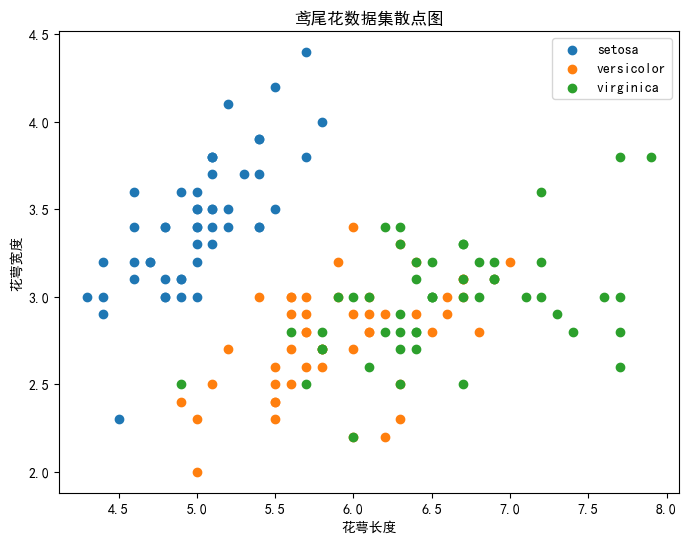

c:\Users\flipp\anaconda4\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


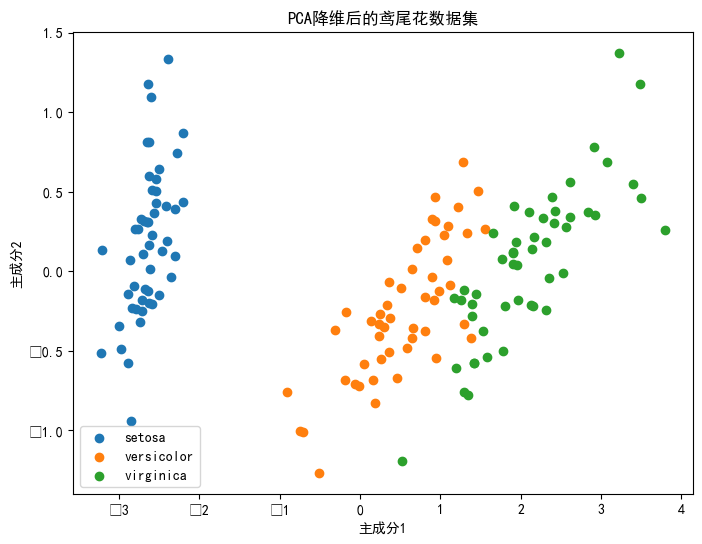

分类准确率: 1.00


In [ ]:
#利用鸢尾花数据集进行实验，鸢尾花数据集可以通过sklearn库导入
#加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
#以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图
#对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2
#以K=3训练分类器
#在测试集上进行测试，最后输出分类准确率
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# 设置黑体为默认字体
plt.rcParams['font.sans-serif'] = ['SimHei']

def plot_scatter(X, y, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    for target, target_name in enumerate(iris.target_names):
        X_plot = X[y == target]
        plt.scatter(X_plot[:, 0], X_plot[:, 1], label=target_name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.show()


# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 绘制散点图
plot_scatter(X, y, '花萼长度', '花萼宽度', '鸢尾花数据集散点图')

# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 绘制PCA降维后的结果
plot_scatter(X_pca, y, '主成分1', '主成分2', 'PCA降维后的鸢尾花数据集')

# 训练KNN分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 在测试集上进行测试
y_pred = knn.predict(X_test)

# 输出分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"分类准确率: {accuracy:.2f}")